# Module 2 Lab 2 - Repeated Measures of Continuous Values
In this lab we will examine a method to analyze repeated meeasurements of the same metric, taken in continuous form.  This method is applicable to a longitudinal study in which a study subject has measurements taken at repeated intervals during the study, and those measurements are continuous.  For example, a study about the effect of exercise on blood pressure over time might have subjects measure blood pressure once every day 7 days for 14 weeks while participating in an exercise regimen.  We would then be interested in knowing if the exercise routine had an effect on blood pressure within each subject.

Recall that there are several methods for comparing the means, such as a one or two sample comparison of means using a t-test, or ANOVA.  We could analyze our repeated measures data set using such methods by taking some summary measure of the repeated values, for example, the mean, median, slope, or even an area under the curve.  What these methods lack however is a way to use the extra information inherent in the time component.  Becuase the data within subjects violate the independence assumption of these other methods, we could not use all of the repeated measures data and would be forced to a summary metric.

A Repeated Measures ANOVA provides a way to analyze such a dataset while keeping all of the information available, namely the measure and the time component.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install pingouin==0.3.9
import pingouin as pg

pd.set_option('display.max_rows', None)


     |████████████████████████████████| 225kB 3.6MB/s eta 0:00:01
     |████████████████████████████████| 38.1MB 39.4MB/s eta 0:00:01     |██████████████████████▎         | 26.6MB 19.6MB/s eta 0:00:01
     |████████████████████████████████| 18.1MB 8.4MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 235kB 23.4MB/s eta 0:00:01
     |████████████████████████████████| 849kB 15.7MB/s eta 0:00:01
  Created wheel for statsmodels: filename=statsmodels-0.13.1-cp37-cp37m-linux_x86_64.whl size=18154851 sha256=8eb07f763ed25ef1ea065f7d9e6c017dcdeb090d6aeb12666e626ef73d996e21
  Stored in directory: /home/dcphw2/.cache/pip/wheels/4f/31/b9/64e28192ca2d2a9aa276d5ec3ecadcf90069bacea1cb6a80ad
Successfully built statsmodels
  Created wheel for pingouin: filename=pingouin-0.3.9-cp37-none-any.whl size=223376 sha256=0fd683c3d57493c5394df241d43ca602fab8d65b1b49ca84506bdccaa4b0e

/opt/conda/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.9, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


## Load data

We will use a dataset studying the effects of margarine consumption on cholesterol over time, documentation of which can be found [here](../resources/cholesterol.html)

In [2]:
data = pd.read_csv('../resources/cholesterol.csv')

display(data.head())

,ID,Before,After4weeks,After8weeks,Margarine
0,1,6.42,5.83,5.75,B
1,2,6.76,6.20,6.13,A
2,3,6.56,5.83,5.71,B
3,4,4.80,4.27,4.15,A
4,5,8.43,7.71,7.67,B


## One-Way ANOVARM
In a One-Way ANOVARM, each subject is measured multiple times.  Because a one way Repeated Measures ANOVA is designed to test changes over time to each subject, it can be called a within-subjects ANOVA.  The test is then checking whether there were differences in the measurements within the subjects, and not across subjects.

The design can be either:
1. Measuring changes in mean values over three or more points in time
1. Measuring changes in mean values under three or more different conditions


## Assumptions for ANOVARM

1. We have continuous measures across either three or more time points or across three or more different conditions.  I.e., we must have a data set where the same subjects are measured three or more times.
1. Observations are independent across subjects, and normally distributed
1. Sphericity: sphericity is when the variances of the differences between all combinations of related groups are equal.  If the assumption is violated, it is possible to apply a correction when doing the ANOVARM.

## Null and Alternative Hypotheses

The Null and Alternative hypotheses are the same as for ANOVA, except in the case of the ANOVARM, the means are for each time point across subjects:

  * $H_0$ : $\mu_1 = \mu_2 = ... = \mu_{n}$
  * $H_A$ : At least one of the means differs
  

### Check for NaN
We should not perform the ANOVARM if we have missing data without first correcting that condition.

In [3]:
data[data.isna().any(axis=1)]


,ID,Before,After4weeks,After8weeks,Margarine


### Check distribution
We will check the distribution of our measures using a histogram plot.

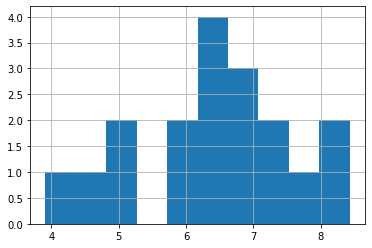

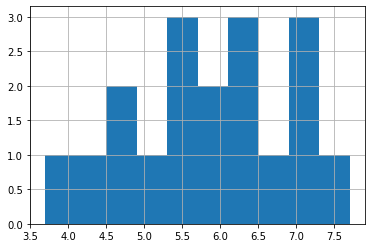

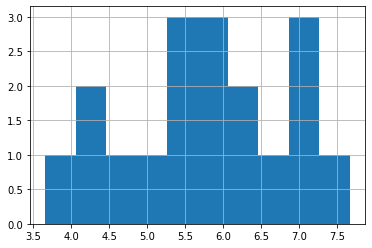

In [4]:
data['Before'].hist()
plt.show()
data['After4weeks'].hist()
plt.show()
data['After8weeks'].hist()

The sample size is very small so these plots are inconclusive, but the data do exhibit some normality.  For the purposes of this exercise, we will proceed under the normal assumption.

We will use the pingouin library to test for sphericity: https://pingouin-stats.org/generated/pingouin.sphericity.html#pingouin.sphericity

In [5]:
pg.sphericity(data=data[['Before','After4weeks','After8weeks']], alpha=0.05)


SpherResults(spher=False, W=0.3809940848308417, chi2=15.43954286966919, dof=2, pval=0.0004439620665701963)

The first value in the tuple indicates that our data does not have the sphericity property under the Mauchly test with $\alpha$ = 0.05.  Using the pingouin library, we will have a correction applied to our test results based on this.

### Data format
Pingouin supports both wide and long formatted repeated measures data. In the wide format, each subject has one row, and there are multiple columns for each measurement made, with some ordering of the columns to indicate the passage of time.

In long format, there is one row for each measurement taken, and the other columns describe the subject and the time component.

Our data is represented in the wide format.  We will send only the measures themselves to the `rm_anova` method, documented [here](https://pingouin-stats.org/generated/pingouin.rm_anova.html).

## Perform a One-Way ANOVARM
We will do a within-subjects comparison to determine if the choleserol over time has a significant change while using margarine.

In [6]:
pg.rm_anova(data=data[['Before','After4weeks','After8weeks']])

,Source,ddof1,ddof2,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Within,2,34,212.32059,6.167367e-20,3.887911e-13,0.925868,0.617663,False,0.380994,0.000444


## Interpretation
In the output table, we can see one row where the source is identified as `Within`, referring to a within sample comparison.  The column `p_unc` is the uncorrected p value for our test.  Because we failed the Sphericity test, pingouin will apply a correction to account for that, and returns the corrected p value in the `p-spher` column.  The `sphericity` column additionally tells us if we failed the sphericity assumption using the same test we previously ran.

The corrected p-values of 0.0004 is the one we use, which is significat at $\alpha$ = 0.05, so we would reject the Null that the within subject means are equal, and support that at least one of the means differs.  Practically, this can be interpeted as the means for cholesterol level vary significantly for at least one of the time points versus the others.

A simple line plot of the means is appropriate here because we are looking at changes at each of the three time points within subjects.  The line plot shows how the mean changes over time.  Based on this, it is reasonable to conclude that using margarine lowers cholesterol over time.

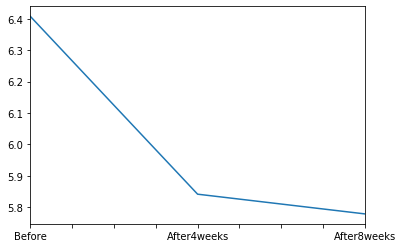

In [7]:
data[['Before','After4weeks','After8weeks']].mean().plot()